## Kmeans


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import warnings
from shapely import wkt, Polygon, Point
warnings.simplefilter(action='ignore', category=FutureWarning)

/Users/dariaonikova/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/xq/qzhlj_357vs3kfkjsn1vg4rm0000gn/T/ipykernel_57692/778130093.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (h

In [4]:
areas = pd.read_csv('areas-pop-geom-space.csv')
areas = areas.drop(columns=['field_1'])
areas['geometry'] = areas['geometry'].apply(wkt.loads)
areas

,district_code,area_name,population,geometry,space,living_space
0,zo,Внуково,24687,"POLYGON ((37.2458 55.6019109, 37.2418516 55.59...",378945.00,169846.50
1,zo,Можайский,137634,"POLYGON ((37.3307568 55.685325, 37.3294276 55....",3525138.10,2951192.00
2,svo,Бибирево,158939,"POLYGON ((37.6440665 55.8976996, 37.6356092 55...",2572168.20,2430648.30
3,vo,Богородское,110049,"POLYGON ((37.6874473 55.8167675, 37.6878233 55...",2338132.30,2171861.02
4,uo,Братеево,108582,"POLYGON ((37.7295024 55.6408925, 37.7453811 55...",1844167.50,1758697.07
...,...,...,...,...,...,...
87,tso,Красносельский,47865,"POLYGON ((37.684842 55.7808113, 37.684818 55.7...",1209627.35,855932.54
88,tso,Мещанский,60044,"POLYGON ((37.620909 55.7589912, 37.6215936 55....",1788118.70,1274209.79
89,tso,Пресненский,128784,"POLYGON ((37.5812267 55.7745578, 37.5814805 55...",4685420.60,3314867.87
90,tso,Таганский,123382,"POLYGON ((37.6352868 55.7538551, 37.6352315 55...",3213656.90,2499755.06


In [5]:
areas_geom = gpd.GeoDataFrame(
    areas, geometry=areas.geometry)
areas_geom.head()

,district_code,area_name,population,geometry,space,living_space
0,zo,Внуково,24687,"POLYGON ((37.24580 55.60191, 37.24185 55.59705...",378945.0,169846.50
1,zo,Можайский,137634,"POLYGON ((37.33076 55.68532, 37.32943 55.68579...",3525138.1,2951192.00
2,svo,Бибирево,158939,"POLYGON ((37.64407 55.89770, 37.63561 55.89368...",2572168.2,2430648.30
3,vo,Богородское,110049,"POLYGON ((37.68745 55.81677, 37.68782 55.81691...",2338132.3,2171861.02
4,uo,Братеево,108582,"POLYGON ((37.72950 55.64089, 37.74538 55.63990...",1844167.5,1758697.07


In [6]:
head_dict = {
    "Адрес ОЖФ": "addr",
    "Глобальный уникальный идентификатор дома по ФИАС": "fias_code",
    "Способ управления": "lead_type",
    "Наименование организации, осуществляющей управление домом": "lead_name",
    "Тип дома" : "type",
    "Состояние": "cond",
    "Общая площадь дома": "space",
    "Жилая площадь в доме": "living_space",
    "Дом находится в собственности субъекта Российской Федерации и в полном объеме используется в качестве общежития" : "dorm_federal",
    "Дом находится в муниципальной собственности и в полном объеме используется в качестве общежития" : "dorm_municipal",
    "Тип общежития" : "dorm_type",
    "Тип помещения (блока)": "room_type",
    "Дата сноса объекта" : "demolition_date",
    "geometry" : "geometry",
    "lat": "lat",
    "lon": "lon",
    "area_num": "area_num",
}

In [7]:

import os


df_list = []
houses_dict = dict()
houses_real_order = dict()
i = 0

for areas_geom_index, areas_geom_row in areas_geom.iterrows():
    area_name = areas_geom_row['area_name']
    houses_dict[area_name] = areas_geom_index
    houses_real_order[area_name] = i
    print(areas_geom_index, area_name)
    
    path = os.path.join('mow-reestr-areas', f'{area_name}.csv')
    df = pd.read_csv(path)
    df_list.append(df)
    i += 1

houses = pd.concat(df_list, ignore_index=True)



0 Внуково
1 Можайский
2 Бибирево
3 Богородское
4 Братеево
5 Коптево
6 Крылатское
7 Некрасовка
8 Проспект Вернадского
9 Ростокино
10 Свиблово
11 Северный
12 Сокольники
13 Академический
14 Алексеевский
15 Алтуфьевский
16 Бабушкинский
17 Бутырский
18 Войковский
19 Головинский
20 Лосиноостровский
21 Молжаниновский
22 Нагорный
23 Нижегородский
24 Ново-Переделкино
25 Обручевский
26 Беговой
27 Бирюлёво Восточное
28 Бирюлёво Западное
29 Вешняки
30 Восточное Дегунино
31 Дорогомилово
32 Зюзино
33 Капотня
34 Косино-Ухтомский
35 Котловка
36 Кузьминки
37 Куркино
38 Лефортово
39 Лианозово
40 Люблино
41 Марьино
42 Метрогородок
43 Митино
44 Нагатинский Затон
45 Новогиреево
46 Новокосино
47 Очаково-Матвеевское
48 Перово
49 Печатники
50 Покровское-Стрешнево
51 Раменки
52 Северное Бутово
53 Северное Медведково
54 Северное Тушино
55 Сокол
56 Солнцево
57 Строгино
58 Текстильщики
59 Тёплый Стан
60 Фили-Давыдково
61 Хамовники
62 Хорошёво-Мнёвники
63 Царицыно
64 Чертаново Северное
65 Чертаново Центральное
66 

In [8]:
houses = houses[head_dict.keys()]
houses = houses.rename(columns=head_dict)
houses

,addr,fias_code,lead_type,lead_name,type,cond,space,living_space,dorm_federal,dorm_municipal,dorm_type,room_type,demolition_date,geometry,lat,lon,area_num
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",e2b601d1-9dce-4daa-93c2-633ee59f7f5c,Не выбран,NaN,Жилой,Исправный,90.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",1389f7e1-1948-43c5-a769-944efdf1777d,Не выбран,NaN,Жилой,Исправный,211.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",1bd548bd-d46a-4991-9062-57eeb638a2ce,Не выбран,NaN,Жилой,Исправный,113.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",ac2010c3-0c83-47e6-b67e-ea555f181975,Не выбран,NaN,Жилой,Исправный,275.0,NaN,-,-,-,NaN,NaN,POINT (37.1928963 55.6036271),55.603627,37.192896,0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",55cc8c65-03a7-46f2-ae61-e8a6e3420b25,Не выбран,NaN,Жилой,Исправный,69.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",adf12acf-cfca-4b7e-acab-af962a58a5de,УО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТСЖ ...",Многоквартирный,Исправный,23595.3,16519.0,нет,нет,-,NaN,NaN,POINT (37.598968 55.791289),55.791289,37.598968,97
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",01a3cfd9-65de-4712-b305-a8e9420a5576,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,13540.5,11495.0,-,-,-,NaN,NaN,POINT (37.600882 55.785939),55.785939,37.600882,97
66797,"127055, Москва г, ул. Тихвинская, д. 7",7136e1b0-e4a6-44aa-a94d-ed4f956f561c,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,2652.6,1948.0,-,-,-,NaN,NaN,POINT (37.600783 55.786779),55.786779,37.600783,97
66798,"127055, Москва г, ул. Тихвинская, д. 9",7ade45e2-1084-4c3a-8cc3-c4abc3129173,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,5328.6,1241.0,-,-,-,NaN,NaN,POINT (37.600352 55.787275),55.787275,37.600352,97


In [9]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import matplotlib.pyplot as plt

In [10]:

houses

,addr,fias_code,lead_type,lead_name,type,cond,space,living_space,dorm_federal,dorm_municipal,dorm_type,room_type,demolition_date,geometry,lat,lon,area_num
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",e2b601d1-9dce-4daa-93c2-633ee59f7f5c,Не выбран,NaN,Жилой,Исправный,90.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",1389f7e1-1948-43c5-a769-944efdf1777d,Не выбран,NaN,Жилой,Исправный,211.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",1bd548bd-d46a-4991-9062-57eeb638a2ce,Не выбран,NaN,Жилой,Исправный,113.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",ac2010c3-0c83-47e6-b67e-ea555f181975,Не выбран,NaN,Жилой,Исправный,275.0,NaN,-,-,-,NaN,NaN,POINT (37.1928963 55.6036271),55.603627,37.192896,0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",55cc8c65-03a7-46f2-ae61-e8a6e3420b25,Не выбран,NaN,Жилой,Исправный,69.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",adf12acf-cfca-4b7e-acab-af962a58a5de,УО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТСЖ ...",Многоквартирный,Исправный,23595.3,16519.0,нет,нет,-,NaN,NaN,POINT (37.598968 55.791289),55.791289,37.598968,97
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",01a3cfd9-65de-4712-b305-a8e9420a5576,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,13540.5,11495.0,-,-,-,NaN,NaN,POINT (37.600882 55.785939),55.785939,37.600882,97
66797,"127055, Москва г, ул. Тихвинская, д. 7",7136e1b0-e4a6-44aa-a94d-ed4f956f561c,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,2652.6,1948.0,-,-,-,NaN,NaN,POINT (37.600783 55.786779),55.786779,37.600783,97
66798,"127055, Москва г, ул. Тихвинская, д. 9",7ade45e2-1084-4c3a-8cc3-c4abc3129173,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,5328.6,1241.0,-,-,-,NaN,NaN,POINT (37.600352 55.787275),55.787275,37.600352,97


[[55.6071768 37.1898994]
 [55.6071768 37.1898994]
 [55.6071768 37.1898994]
 ...
 [55.786779  37.600783 ]
 [55.787275  37.600352 ]
 [55.787082  37.600415 ]]


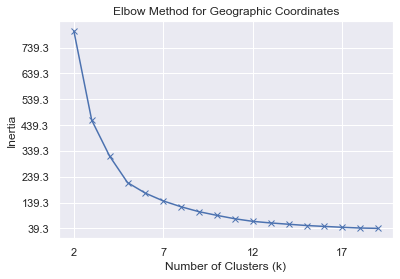

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
latitudes =  houses['lat'].values.reshape(-1, 1)
longitudes =  houses['lon'].values.reshape(-1, 1)

coordinates = np.column_stack((latitudes, longitudes))

print(coordinates)

# Define the range of possible cluster numbers to try
k_values = range(2, 20)

# Initialize a list to store the within-cluster sum of squares (inertia) for each k value
inertia_values = []

# Calculate the inertia for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(coordinates)
    kmeans.fit(coordinates)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, 'bx-')
plt.xticks(np.arange(min(k_values), max(k_values)+1, 5.0))
plt.yticks(np.arange(min(inertia_values), max(inertia_values)+1, 100.0))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Geographic Coordinates')
plt.show()

In [12]:
houses

,addr,fias_code,lead_type,lead_name,type,cond,space,living_space,dorm_federal,dorm_municipal,dorm_type,room_type,demolition_date,geometry,lat,lon,area_num
0,"108809, Москва г, д. Толстопальцево, ул. Совет...",e2b601d1-9dce-4daa-93c2-633ee59f7f5c,Не выбран,NaN,Жилой,Исправный,90.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
1,"108809, Москва г, д. Толстопальцево, ул. Совет...",1389f7e1-1948-43c5-a769-944efdf1777d,Не выбран,NaN,Жилой,Исправный,211.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
2,"108809, Москва г, д. Толстопальцево, ул. Совет...",1bd548bd-d46a-4991-9062-57eeb638a2ce,Не выбран,NaN,Жилой,Исправный,113.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
3,"108809, Москва г, д. Толстопальцево, ул. Совет...",ac2010c3-0c83-47e6-b67e-ea555f181975,Не выбран,NaN,Жилой,Исправный,275.0,NaN,-,-,-,NaN,NaN,POINT (37.1928963 55.6036271),55.603627,37.192896,0
4,"108809, Москва г, д. Толстопальцево, ул. Совет...",55cc8c65-03a7-46f2-ae61-e8a6e3420b25,Не выбран,NaN,Жилой,Исправный,69.0,NaN,-,-,-,NaN,NaN,POINT (37.1898994 55.6071768),55.607177,37.189899,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66795,"127055, Москва г, ул. Тихвинская, д. 39",adf12acf-cfca-4b7e-acab-af962a58a5de,УО,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ТСЖ ...",Многоквартирный,Исправный,23595.3,16519.0,нет,нет,-,NaN,NaN,POINT (37.598968 55.791289),55.791289,37.598968,97
66796,"127055, Москва г, ул. Тихвинская, д. 3, корп. 1",01a3cfd9-65de-4712-b305-a8e9420a5576,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,13540.5,11495.0,-,-,-,NaN,NaN,POINT (37.600882 55.785939),55.785939,37.600882,97
66797,"127055, Москва г, ул. Тихвинская, д. 7",7136e1b0-e4a6-44aa-a94d-ed4f956f561c,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,2652.6,1948.0,-,-,-,NaN,NaN,POINT (37.600783 55.786779),55.786779,37.600783,97
66798,"127055, Москва г, ул. Тихвинская, д. 9",7ade45e2-1084-4c3a-8cc3-c4abc3129173,УО,ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ УЧРЕЖДЕНИЕ ГОРОДА МО...,Многоквартирный,Исправный,5328.6,1241.0,-,-,-,NaN,NaN,POINT (37.600352 55.787275),55.787275,37.600352,97


In [13]:
cut_houses = houses
df_features = pd.get_dummies(cut_houses['lead_type'], prefix='lead_type')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

df_features = pd.get_dummies(cut_houses['type'], prefix='type')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

df_features = pd.get_dummies(cut_houses['cond'], prefix='cond')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

df_features = pd.get_dummies(cut_houses['dorm_federal'], prefix='dorm_federal')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

df_features = pd.get_dummies(cut_houses['dorm_municipal'], prefix='dorm_municipal')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

df_features = pd.get_dummies(cut_houses['dorm_type'], prefix='dorm_type')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

df_features = pd.get_dummies(cut_houses['room_type'], prefix='room_type')
cut_houses = pd.concat([cut_houses, df_features], axis=1)

cols =  ['area_num', 'cond_Аварийный', 'cond_Ветхий',
        'cond_Исправный', 'dorm_federal_-',
        'dorm_federal_нет',  'dorm_municipal_-',
        'dorm_municipal_да', 'dorm_municipal_нет',  'dorm_type_-',
        'dorm_type_Гостиничный', 'dorm_type_Коридорный',
         'lat', 'lead_type_ЖК',
        'lead_type_Иной кооператив', 'lead_type_Не выбран',
        'lead_type_Непосредственное управление', 'lead_type_ТСЖ',
        'lead_type_УО', 'living_space', 'lon', 'room_type_Жилое',
        'space',  'type_Жилой', 'type_Жилой дом блокированной застройки',
        'type_Многоквартирный']
cut_houses = cut_houses[cols]
cut_houses['living_space'] = cut_houses['living_space'].fillna(0)
cut_houses['space'] = cut_houses['living_space'].fillna(0)

cut_houses

,area_num,cond_Аварийный,cond_Ветхий,cond_Исправный,dorm_federal_-,dorm_federal_нет,dorm_municipal_-,dorm_municipal_да,dorm_municipal_нет,dorm_type_-,...,lead_type_Непосредственное управление,lead_type_ТСЖ,lead_type_УО,living_space,lon,room_type_Жилое,space,type_Жилой,type_Жилой дом блокированной застройки,type_Многоквартирный
0,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0.0,37.189899,0,0.0,1,0,0
1,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0.0,37.189899,0,0.0,1,0,0
2,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0.0,37.189899,0,0.0,1,0,0
3,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0.0,37.192896,0,0.0,1,0,0
4,0,0,0,1,1,0,1,0,0,1,...,0,0,0,0.0,37.189899,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66795,97,0,0,1,0,1,0,0,1,1,...,0,0,1,16519.0,37.598968,0,16519.0,0,0,1
66796,97,0,0,1,1,0,1,0,0,1,...,0,0,1,11495.0,37.600882,0,11495.0,0,0,1
66797,97,0,0,1,1,0,1,0,0,1,...,0,0,1,1948.0,37.600783,0,1948.0,0,0,1
66798,97,0,0,1,1,0,1,0,0,1,...,0,0,1,1241.0,37.600352,0,1241.0,0,0,1


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init ='k-means++')
kmeans.fit(cut_houses[cols]) # Compute k-means clustering.
cut_houses['cluster_label'] = kmeans.fit_predict(cut_houses[cols])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cut_houses[cols]) # Labels of each point

cut_houses.head(10)

,area_num,cond_Аварийный,cond_Ветхий,cond_Исправный,dorm_federal_-,dorm_federal_нет,dorm_municipal_-,dorm_municipal_да,dorm_municipal_нет,dorm_type_-,...,lead_type_ТСЖ,lead_type_УО,living_space,lon,room_type_Жилое,space,type_Жилой,type_Жилой дом блокированной застройки,type_Многоквартирный,cluster_label
0,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1
1,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1
2,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1
3,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.192896,0,0.0,1,0,0,1
4,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1
5,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1
6,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1
7,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,0,1,0,1
8,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.187625,0,0.0,1,0,0,1
9,0,0,0,1,1,0,1,0,0,1,...,0,0,0.0,37.189899,0,0.0,1,0,0,1


In [15]:
cut_houses.to_csv("kmeans.csv")